In [1]:
import numpy as np
import pandas as pd 

In [2]:
#设置资金
wallet = {'USD':1000 ,'gold': 0 , 'bitc': 0}

In [4]:
data1 = pd.read_csv(r'bitc_kdj.csv')
data2 = pd.read_csv(r'gold_kdj.csv')

In [5]:
#第一步获取上周最高价、最低价、结束价、开始价
high =[621.650000]  #阻力线
low =[607.040000]   #支撑线
close = [607.040000]
open_ = [621.650000]
today_open = [621.650000]  #止损

for i in range(1,len(data1)):
    today_open.append(data1['open'][i])
    high.append(data1['high'][i-1])
    low.append(data1['low'][i-1])
    close.append(data1['close'][i-1])
    open_.append(data1['open'][i-1])

In [6]:
high2 =[1324.60]  #阻力线
low2 =[1308.35]   #支撑线
close2 = [1308.35]
open_2 = [1324.60]
today_open2 = [1324.60]  #止损

for i in range(1,len(data2)):
    today_open2.append(data1['open'][i])
    high2.append(data1['high'][i-1])
    low2.append(data1['low'][i-1])
    close2.append(data1['close'][i-1])
    open_2.append(data1['open'][i-1])

In [7]:
def Step(num , i):
    if (num == 1):
        if ((wallet['gold'] == 0 )&( wallet['bitc'] == 0)): #表明没有持仓
            if (data1['close'][i] >= data1['high'][i-1]):
                money = wallet['USD']
                wallet['USD']=0
                wallet['bitc']=money*(1-0.02)/data1['open'][i]
            elif (data1['close'][i] <= data1['low'][i-1]):
                money = wallet['USD']
                wallet['USD']=0
                wallet['bitc']=money*(1-0.02)/data1['open'][i]
            return
            
        if (data1['close'][i-1]>data1['open'][i-1]):  #处于多头持仓状态
            if (data1['close'][i] < data1['open'][i-1]):
                money = wallet['bitc']
                wallet['bitc']=0
                wallet['USD']=money * data1['open'][i] * 0.98
                return
        elif (data1['close'][i-1]<data1['open'][i-1]): #处于空头持仓
            if (data1['close'][i] > data1['open'][i-1]):
                money = wallet['bitc']
                wallet['bitc']=0
                wallet['USD']=money * data1['open'][i] * 0.98
                return
            
    elif (num == 2):
        if ((wallet['gold'] == 0) & (wallet['bitc'] == 0)): #表明没有持仓
            if (data2['close'][i] >= data2['high'][i-1]):
                money = wallet['USD']
                wallet['USD']=0
                wallet['gold']=money*(1-0.01)/data2['open'][i]
            elif (data2['close'][i] <= data2['low'][i-1]):
                money = wallet['USD']
                wallet['USD']=0
                wallet['gold']=money*(1-0.01)/data2['open'][i]
            return
        if (data2['close'][i-1]>data2['open'][i-1]): #处于多头持仓状态
            if (data2['close'][i] < data2['open'][i-1]):
                money = wallet['gold']
                wallet['gold']=0
                wallet['USD']=money * data2['open'][i] * 0.99
                return
        elif (data2['close'][i-1]<data2['open'][i-1]): #处于空头持仓
            if (data2['close'][i] > data2['open'][i-1]):
                money = wallet['gold']
                wallet['gold']=0
                wallet['USD']=money * data2['open'][i] * 0.99
                return
        

In [8]:
#第二步 计算上轨和下轨。当价格上穿上轨时，买入开仓；当价格下穿下轨时，卖出开仓。

wallet = {'USD':1000 ,'gold': 0 , 'bitc': 0}
final = []

final.append(wallet['USD'])
print(wallet,'USD:' ,wallet['USD'])
for i in range(1,min(len(data1),len(data2))):

    if ((data1['close'][i]-data1['open'][i])/data1['close'][i] >= (data2['close'][i]-data2['open'][i])/data2['close'][i]):
        Step(1,i) #比特币上周上涨更快，购买比特币
    else :
        Step(2,i) #黄金上涨块，购买黄金
    final.append(wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
    print(wallet,'USD:' ,wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
   

{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 980.0999999999999
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 982.3431339639914
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 1000.923760299054
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 988.8482224595666
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 981.9692783033262
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 938.0038526090937
{'USD': 0, 'gold': 0.755263960939884, 'bitc': 0} USD: 937.2187557216967
{'USD': 0.0, 'gold': 0.755263960939884, 'bitc': 0} USD: 935.9476464754348
{'USD': 0.0, 'gold': 0.755263960939884, 'bitc': 0} USD: 948.8830523344521
{'USD': 0.0, 'gold': 0.755263960939884, 'bitc': 0} USD: 946.2660627097954
{'USD': 0.0, 'gold': 0.755263960939884, 'bitc': 0} USD: 946.7894606347269
{'USD': 0.0, 'gold': 0.755263960939884, 'bitc': 0} USD: 963.3886519682636
{'USD': 0.0, 'gold': 0.755263960939884, 'bitc': 0} USD: 974.1183094293561
{'USD'

In [10]:
def Step1(num , i):
    K1=0.05
    K2=0.05
    if (num == 1):
        
        #引入Dual Thrust策略
        HH=0
        LC=0
        HC=0
        LL=0
        if (i>=1):
            for j in range(1,2):
                HH = max(HH,data1['high'][j])
                HC = max(HC,data1['close'][j])
                LC = min(LC,data1['close'][j])
                LL = min(LL,data1['low'][j])
            rang=max((HH-LC),(HC-LL))
            Buyline = data1['open'][i]+K1*rang
            Sellline = data1['open'][i]-K2*rang
        else:
            Buyline = data1['high'][i-1]
            Sellline = data1['low'][i-1]*0.99
        #引入123法则
        min_ = 0
        if (i>=14):
            for j in range(2,15):
                min_ = min(min_,data1['low'][i-j])
        else: min_ = data1['low'][0]
        
        min_1 = 0
        if (i>=30):
            for j in range(0,14):
                min_1 = min(min_1,data1['low'][i-j])
                
        #引入跳空交易系统
        average = (data1['low'][i]+data1['high'][i]+data1['open'][i]+data1['close'][i])/4
       
        if ((wallet['gold'] == 0 )&( wallet['bitc'] == 0)): #表明没有持仓
            if (
                (min_1>min_)|
                (data1['close'][i] >= min_)|
                (data1['close'][i] >= Buyline) | 
                (data1['close'][i] <average*0.96)
               ):
                    
                money = wallet['USD']
                wallet['USD']=0
                wallet['bitc']=money*(1-0.02)/data1['open'][i]
            elif ((data1['open'][i] <= Sellline)):
                money = wallet['USD']
                wallet['USD']=0
                wallet['bitc']=money*(1-0.02)/data1['open'][i]
            return
            
        if (data1['close'][i-1]>data1['open'][i-1]):  #处于多头持仓状态
            if (data1['close'][i] < Sellline):
                money = wallet['bitc']
                wallet['bitc']=0
                wallet['USD']=money * data1['open'][i] * 0.98
                return
        elif (data1['close'][i-1]<data1['open'][i-1]): #处于空头持仓
            if (data1['close'][i] > Buyline):
                money = wallet['bitc']
                wallet['bitc']=0
                wallet['USD']=money * data1['open'][i] * 0.98
                return
            
    elif (num == 2):
                
        #引入Dual Thrust策略
        HH=0
        LC=0
        HC=0
        LL=0
        if (i>=2):
            for j in range(1,2):
                HH = max(HH,data2['high'][j])
                HC = max(HC,data2['close'][j])
                LC = min(LC,data2['close'][j])
                LL = min(LL,data2['low'][j])
            rang=max((HH-LC),(HC-LL))
            Buyline = data2['open'][i]+K1*rang
            Sellline = data2['open'][i]-K2*rang
        else:
            Buyline = data2['high'][i-1]
            Sellline = data2['low'][i-1]*0.99
        #引入123法则
        min_ = 0
        if (i>=14):
            for j in range(2,15):
                min_ = min(min_,data2['low'][i-j])
        else: min_ = data2['low'][0]
        
        min_1 = 0
        if (i>=30):
            for j in range(0,14):
                min_1 = min(min_1,data2['low'][i-j])
        
        average = (data2['low'][i]+data2['high'][i]+data2['open'][i]+data2['close'][i])/4
        if ((data2['close'][i] >= min_)|(wallet['gold'] == 0) & (wallet['bitc'] == 0)): #表明没有持仓
            if (
                (min_1>min_)|
                (data2['close'][i] >= Buyline) | 
                (data2['close'][i] <average*0.96 )
               ):
                money = wallet['USD']
                wallet['USD']=0
                wallet['gold']=money*(1-0.01)/data2['open'][i]
            elif (data2['open'][i] <= Sellline):
                money = wallet['USD']
                wallet['USD']=0
                wallet['gold']=money*(1-0.01)/data2['open'][i]
            return
        if (data2['close'][i-1]>data2['open'][i-1]): #处于多头持仓状态
            if (data2['close'][i] < Sellline):
                money = wallet['gold']
                wallet['gold']=0
                wallet['USD']=money * data2['open'][i] * 0.99
                return
        elif (data2['close'][i-1]<data2['open'][i-1]): #处于空头持仓
            if (data2['close'][i] > Buyline):
                money = wallet['gold']
                wallet['gold']=0
                wallet['USD']=money * data2['open'][i] * 0.99
                return

In [11]:
#第二步 菲阿里四价改进版

wallet = {'USD':1000 ,'gold': 0 , 'bitc': 0}
final = []

final.append(wallet['USD'])
print(wallet,'USD:' ,wallet['USD'])
for i in range(1,min(len(data1),len(data2))):
        
    #避免货币手中贬值
    if (wallet['bitc']!=0 & (wallet['USD']==0 & (data1['open'][i]>data1['open'][i-1]))):
        money = wallet['bitc']
        wallet['bitc']=0
        wallet['USD']=money * data1['open'][i] * 0.98
        final.append(wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
        print(wallet,'USD:' ,wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
        continue
    elif(wallet['gold']!=0 & (wallet['USD']==0 & (data2['open'][i]>data2['open'][i-1]))):
        money = wallet['gold']
        wallet['gold']=0
        wallet['USD']=money * data2['open'][i] * 0.99
        final.append(wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
        print(wallet,'USD:' ,wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
        continue
        
        
    if ((data1['close'][i]-data1['open'][i])/data1['close'][i] >= (data2['close'][i]-data2['open'][i])/data2['close'][i]):
        Step1(1,i) #比特币上周上涨更快，购买比特币
    else :
        Step1(2,i) #黄金上涨块，购买黄金
    final.append(wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
    print(wallet,'USD:' ,wallet['USD']+wallet['gold']*data2['open'][i]*0.99+wallet['bitc']*data1['open'][i]*0.98)
   

{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000
{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000.0
{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000.0
{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000.0
{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000.0
{'USD': 1000, 'gold': 0, 'bitc': 0} USD: 1000.0
{'USD': 0, 'gold': 0, 'bitc': 1.6229195992382213} USD: 960.4
{'USD': 974.920910822224, 'gold': 0, 'bitc': 0} USD: 974.920910822224
{'USD': 0, 'gold': 0, 'bitc': 1.5735407829733843} USD: 936.3140427536638
{'USD': 947.9720917065571, 'gold': 0, 'bitc': 0} USD: 947.9720917065571
{'USD': 0, 'gold': 0, 'bitc': 1.5111548219210857} USD: 910.4323968749774
{'USD': 938.9403325905187, 'gold': 0, 'bitc': 0} USD: 938.9403325905187
{'USD': 938.9403325905187, 'gold': 0, 'bitc': 0} USD: 938.9403325905187
{'USD': 0, 'gold': 0, 'bitc': 1.465878936370847} USD: 901.758295419934
{'USD': 938.4337068805708, 'gold': 0, 'bitc': 0} USD: 938.4337068805708
{'USD': 0, 'gold': 0, 'bitc': 1.4117200594718846} USD: 901.2717320881001
{'USD

In [12]:
data2["money"] = final

In [13]:
data2

,date,open,high,low,close,value,money
0,2016/9/12-2016/9/14,1324.60,1324.60,1321.75,1321.75,29570,1000.000000
1,2016/9/15-2016/9/19,1310.80,1314.85,1308.35,1314.85,34330,1000.000000
2,2016/9/20-2016/9/22,1313.80,1339.10,1313.80,1339.10,43060,1000.000000
3,2016/9/23-2016/9/27,1338.65,1340.50,1327.00,1327.00,32400,1000.000000
4,2016/9/28-2016/9/30,1322.50,1322.50,1318.10,1322.50,31100,1000.000000
...,...,...,...,...,...,...,...
410,2021/8/19-2021/8/23,1782.05,1802.00,1779.05,1802.00,30880,1659.044928
411,2021/8/24-2021/8/26,1808.45,1808.45,1786.60,1786.60,29840,1593.346749
412,2021/8/27-2021/9/1,1798.50,1814.85,1798.50,1811.80,13840,1721.615279
413,2021/9/2-2021/9/6,1812.55,1823.70,1812.55,1821.60,5770,1721.615279


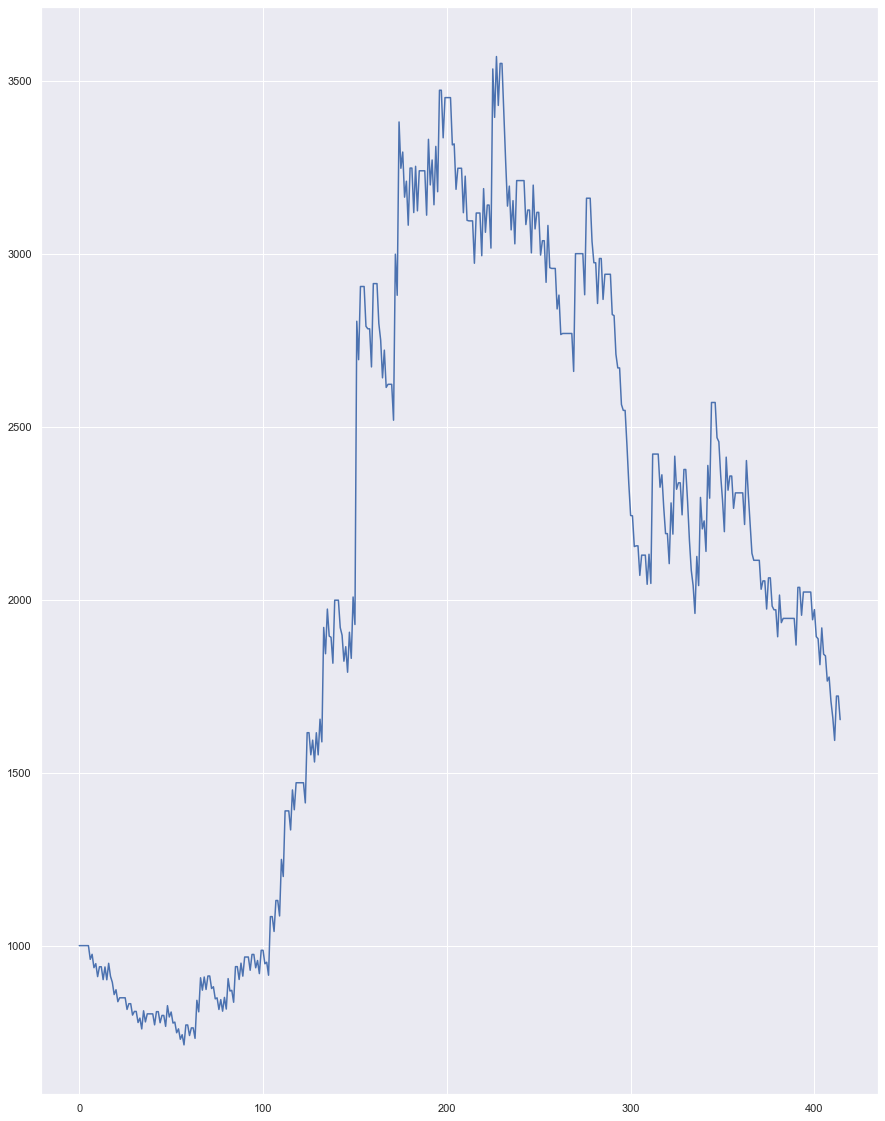

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(15.0, 20.0))

x= data2["date"].index
y= data2["money"]
plt.plot(x,y)
plt.show()